<a href="https://colab.research.google.com/github/alijawad480/BBC_Archivied-NLP-Project/blob/main/BBC_Archived_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [31]:
df=pd.read_csv('/content/bbc-news-data.csv',on_bad_lines='skip',sep='\t')

In [33]:
df = df.drop(columns=['filename'])

In [28]:
print(df.columns.tolist())

['category\tfilename\ttitle\tcontent']


In [34]:
df.head()

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [35]:
df.shape

(2225, 3)

In [39]:
df.isnull().sum()

,0
category,0
title,0
content,0


In [40]:
df['text']=df['title']+" "+df['content']

In [41]:
X=df['text']
y=df['category']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfidf = TfidfVectorizer(stop_words='english',max_df=0.7)

In [45]:
X_vect = tfidf.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_vect,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train,y_train)

LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
y_pred = lr.predict(X_test)

In [54]:
print(accuracy_score(y_test,y_pred))

0.9707865168539326


In [55]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

     business       0.94      0.98      0.96       115
entertainment       0.99      0.96      0.97        72
     politics       0.99      0.96      0.97        76
        sport       0.99      0.99      0.99       102
         tech       0.96      0.95      0.96        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



In [61]:
text = "Microsoft releases new version of Windows."

In [62]:
text_vector = tfidf.transform([text])

In [63]:
lr.predict(text_vector)[0]

'tech'

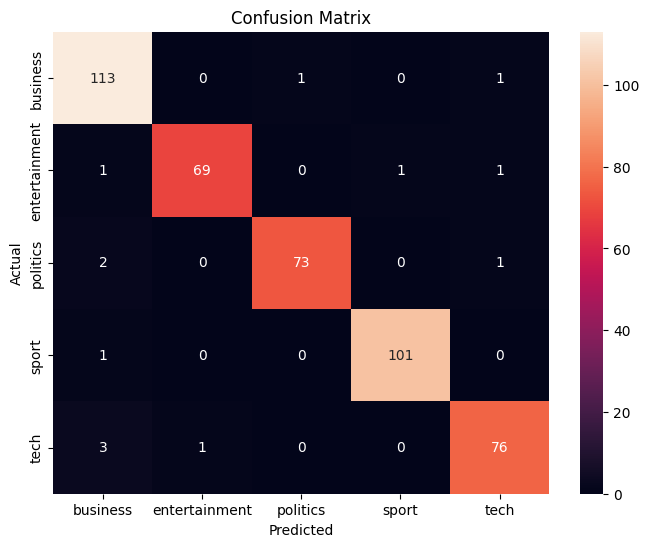

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()